### Some exploration on FAW inspections frequency

To prepare for our offer with the Indian Gov.

In [1]:
%pylab inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


Populating the interactive namespace from numpy and matplotlib


In [2]:
# Set pandas options so that whole table is shown later:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

#nicer plots
plt.style.use('default')
figsize(12, 6)
pd.set_option('display.width', 4000)
pd.set_option('display.max_columns', 100)

# Reading the data into a pandas dataframe
faw = pd.read_csv('data/FAMEWS_30September2019.csv', encoding='latin')

/Users/angeldejaen/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (42,43) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
faw

,date,cropFieldSizeUnit,scouting,traps,locationName,cropVariety,cropPlantingDate,rainLastDate,country,userCountry,region,latitude,longitude,cropMain,cropFertilizer,cropIrrigation,cropStage,cropHealth,cropSystem,cropFieldSize,rainAmount,trapsCount,trapsConfirmedFAW,trapsSuspectedFAW,trapsOtherSpecies,cropRotation,scoutingPlantsChecked,scoutingPlantsFAW,scoutingPercentageFAW,fawCropDamage,fawCobDamage,fawNaturalEnemies,fawDeadLarvae,fawControlUndertaken,fawControlChemicalPesticideName,fawControlChemicalPesticideLitres,scoutingStageFAW,fawCurrentDamage,fawPreviousDamage,fawControlLocalTypes,fawControlBiopesticideName,fawControlBiopesticideLitres,fawLarvaeKilledByNaturalEnemies,rotationIntercroppingCrop,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86
0,9/30/2019 8:32,ha,True,False,Bandiabougou,Locale,7/23/2019 2:00,9/19/2019 2:00,BF,NaN,Gourma Province,12.113715,0.203626,sorghum,no,rainFed,reproductive,medium,seasonal,2.5,light,NaN,NaN,NaN,NaN,NaN,50.0,0.0,0.0,none,NaN,none,none,none,NaN,NaN,NaN,none,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9/30/2019 8:28,ha,True,False,Bandiabougou,Locale,7/30/2019 2:00,9/19/2019 2:00,BF,NaN,Gourma Province,12.114312,0.200438,sorghum,no,rainFed,reproductive,medium,seasonal,3.0,light,NaN,NaN,NaN,NaN,NaN,50.0,0.0,0.0,none,NaN,none,none,none,NaN,NaN,NaN,none,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9/30/2019 8:28,ha,True,False,Bandiabougou,Locale,7/30/2019 2:00,9/19/2019 2:00,BF,NaN,Gourma Province,12.114312,0.200438,sorghum,no,rainFed,reproductive,medium,seasonal,3.0,light,NaN,NaN,NaN,NaN,NaN,50.0,0.0,0.0,none,NaN,none,none,none,NaN,NaN,NaN,none,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9/30/2019 8:20,ha,True,False,Lantargou,Locale,7/18/2019 2:00,9/19/2019 2:00,BF,NaN,Gourma Province,12.115014,0.197061,maize,no,rainFed,reproductive,good,seasonal,2.0,light,NaN,NaN,NaN,NaN,NaN,50.0,3.0,6.0,low,none,none,none,none,NaN,NaN,[Record],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9/30/2019 8:20,ha,True,False,Lantargou,Locale,7/18/2019 2:00,9/19/2019 2:00,BF,NaN,Gourma Province,12.115014,0.197061,maize,no,rainFed,reproductive,good,seasonal,2.0,light,NaN,NaN,NaN,NaN,NaN,50.0,3.0,6.0,low,none,none,none,none,NaN,NaN,[Record],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39008,3/12/2018 12:50,ha,True,False,Showgrounds,GB 664A,12/4/2017 23:00,3/9/2018 23:00,ZM,NaN,NaN,-16.810599,26.971077,maize,yes,rainFed,reproductive,medium,seasonal,1.0,l

In [4]:
faw.shape

(39013, 87)

In [5]:
# Deleting duplicated rows:
faw.drop_duplicates(inplace=True)

In [6]:
faw.shape

(18500, 87)

In [7]:
faw.country.value_counts().head(10)

BF    4577
ET    2658
GH    2085
ZM    1619
YE    1612
MZ     971
TZ     806
RW     799
CV     662
UG     653
Name: country, dtype: int64

In [8]:
faw.locationName.value_counts().head(10)

dasera       322
workemla     231
??           139
woreb        137
Zenzelima    132
maji         127
Lundazi      112
Dang'aida     92
adissalem     79
Lafteni       72
Name: locationName, dtype: int64

In [9]:
# We create a dummy target (whether or not any FAW was found):
faw['target'] = ((faw.trapsConfirmedFAW > 0) | (faw.scoutingPlantsFAW > 0))

In [10]:
faw['target']

0        False
1        False
3         True
5         True
7         True
         ...  
39008     True
39009    False
39010     True
39011     True
39012     True
Name: target, Length: 18500, dtype: bool

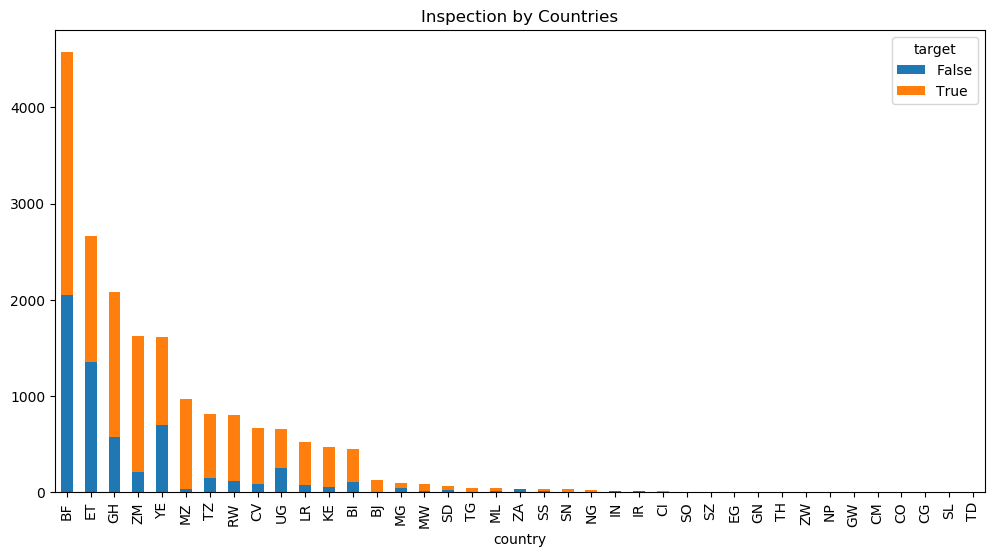

In [11]:
ord_country=faw.country.value_counts().index.to_list()
faw.groupby('country').target.value_counts().unstack().reindex(ord_country).plot.bar(
    title='Inspection by Countries', stacked=True)


In [12]:
pd.options.display.max_rows = 100

### We calculate the proportion of positives

In [13]:
faw.target.mean()

0.6823243243243243

### We calculate the proportion of positives by location

In [14]:
faw[['locationName', 'target']].groupby('locationName'
                                       ).agg(['count', 'mean']
                                            ).sort_values(('target', 'count'),
                                                          ascending=False).head(100)



target          
                            count      mean
locationName                               
dasera                        322  0.279503
workemla                      231  0.619048
??                            139  0.028777
woreb                         137  0.357664
Zenzelima                     132  0.295455
maji                          127  0.874016
Lundazi                       112  0.866071
Dang'aida                      92  0.706522
adissalem                      79  0.392405
Lafteni                        72  0.208333
Tigiri                         65  0.323077
Kuphane                        58  0.827586
Yalgo                          57  0.105263
ura                            56  0.000000
dilamo                         56  0.392857
Satara                         55  0.836364
Gataraga                       54  1.000000
Ponte Sul                      51  0.960784
Di                             47  0.957447
Gufii                          44  0.090909
Nakwanga                       43  0.395349
????                           42  0.214286
Chijemu                        42  0.952381
Busire                         41  1.000000
Ocokoimaki                     41  0.585366
Busigari                       40  1.000000
Goroora                        40  0.475000
Asokore Mampong                40  0.800000
Niassan                        39  0.820513
Musebeya                       39  0.769231
CARI                           39  0.846154
Mgama                          38  0.710526
Kigufi                         38  0.394737
Busogo gisesero                38  1.000000
maij                           37  0.918919
Bittou                         37  0.270270
Nyamigogo/kanama               37  0.972973
Nakuyon                        35  0.485714
Guiaro                         34  0.617647
Lagoa de Ribeira das Patas     34  1.000000
Qatabah                        33  1.000000
Coalla                         33  0.090909
Lukhokhwe                      33  0.696970
Mahoko,kanama                  32  0.968750
maj                            31  0.935484
Nakamtenga                     31  0.741935
wermt                          31  0.806452
Mivo                           31  0.838710
Cyanzarwe                      31  1.000000
Tano Odumasi                   30  0.533333
Kavumu                         30  0.633333
Inhazonia                      30  1.000000
Bunkpurugu                     30  0.133333
Kongoussi                      30  0.133333
Tegat                          30  1.000000
Mané                           29  0.275862
tissabay                       29  0.931034
Zegie                          29  0.724138
Nyamahana                      29  1.000000
Baro                           28  1.000000
Teshie Demo                    28  0.500000
Souli                          28  0.964286
Akuya                          28  0.964286
Dabboo,qocee                   27  0.000000
Agric Ridge                    27  0.222222
Nyamugari                      27  0.851852
Tarim                          27  0.000000
nkhanga                        27  0.962963
Dasera kebele                  26  0.076923
Ihemi                          24  0.458333
Rugori                         24  0.875000
ODUKURUN                       24  1.000000
Bufaat                         24  0.750000
Koumbia                        24  0.416667
Tanghin                        24  0.333333
Gossina                        24  0.625000
Makuyuni                       24  0.791667
Gnangdin                       23  0.260870
weramit                        23  0.739130
Chapuri                        23  0.565217
Mufulira                       23  1.000000
Buyyoo                         23  0.000000
Nkum                           23  0.608696
Workemla                       22  0.681818
Jennete                        22  0.363636
DANIVAARI/STK                  22  0.590909
Abiya                          22  0.818182
Panama                         22  0.954545
Ziniaré                

In [15]:
faw.target.mean()

0.6823243243243243

In [16]:
faw[faw.country=='ET'][['locationName', 'target']].groupby('locationName'
                                       ).agg(['count', 'mean']
                                            ).sort_values(('target', 'count'),
                                                          ascending=False).head(100)

target          
                count      mean
locationName                   
dasera            322  0.279503
workemla          231  0.619048
??                139  0.028777
woreb             137  0.357664
Zenzelima         132  0.295455
maji              127  0.874016
adissalem          79  0.392405
Lafteni            72  0.208333
Tigiri             65  0.323077
Kuphane            58  0.827586
dilamo             56  0.392857
ura                56  0.000000
Satara             55  0.836364
Gufii              44  0.090909
maij               37  0.918919
????               36  0.222222
wermt              31  0.806452
maj                31  0.935484
tissabay           29  0.931034
Zegie              29  0.724138
Dabboo,qocee       27  0.000000
Dasera kebele      26  0.076923
Bufaat             24  0.750000
weramit            23  0.739130
Buyyoo             23  0.000000
Workemla           22  0.681818
Jennete            22  0.363636
Yabbo              22  0.590909
Gelani             21  0.285714
Hallosebaka        21  0.380952
Dasera             21  0.238095
Kejja Araba        19  0.789474
Tigire             16  0.250000
zegi               16  0.937500
Shomba,cichib      16  0.312500
Yebbo              15  1.000000
kupa               14  1.000000
sesaberet          14  1.000000
Buuyyoo            13  0.076923
Dabbooqocee        13  0.153846
Somboo             12  0.250000
KejjaAraba         12  1.000000
malka hanbacho     11  1.000000
Galani             11  0.363636
Kupa               10  0.900000
???????            10  0.000000
Temami              9  0.888889
Kechama             9  1.000000
Garado              9  0.555556
Sombo               9  1.000000
Yanga               9  0.888889
Jannate             8  0.625000
Malka hanbacho      7  0.428571
Kambo               7  1.000000
Sombo daru          7  0.714286
Ceraba              6  0.833333
Kuti                6  0.833333
Ahuri               6  1.000000
Sadacha             6  1.000000
Bufat               6  0.833333
Dono                5  1.000000
Kooda               5  1.000000
Ceraaba             5  0.000000
workmla             5  0.400000
Y/dogma             5  1.000000
Bilo                5  1.000000
wermit              5  0.600000
Usmani              5  0.800000
gara huda           4  1.000000
Waarsu              4  1.000000
Shoma,cichib        4  0.000000
Gurd Shola          4  0.750000
Ginabe              4  0.750000
Hanee               4  0.500000
kat                 4  0.000000
Bufata              4  1.000000
Buyyo               4  0.000000
Yabcha. Wolga       4  1.000000
Yeboden             3  0.333333
Mandara             3  1.000000
Maj                 3  1.000000
Zingage             3  0.666667
Shomba,cicib        3  0.333333
Kaire               3  0.000000
Shombacichib        3  0.000000
Damile              3  1.000000
lalibela            3  1.000000
yeboden             3  0.666667
Daboqoce            3  0.000000
Daabboo,qocee       3  0.000000
zegie               2  1.000000
Chala               2  1.000000
Seka                2  1.000000
Daabbo,qocee        2  0.000000
Kecho               2  1.000000
Shabe Test          2  0.500000
CARABA              2  1.000000
Kishe               2  0.500000
wermte              2  1.000000
Bufataa             2  1.000000

In [17]:
faw[faw.country=='ET'].target.mean()

0.4924755455229496

In [18]:
faw[faw.country=='BF'][['locationName', 'target']].groupby('locationName'
                                       ).agg(['count', 'mean']
                                            ).sort_values(('target', 'count'),
                                                          ascending=False).head(100)

target          
               count      mean
locationName                  
Yalgo             57  0.105263
Di                47  0.957447
Niassan           39  0.820513
Bittou            37  0.270270
Guiaro            34  0.617647
Coalla            33  0.090909
Nakamtenga        31  0.741935
Kongoussi         30  0.133333
Mané              29  0.275862
Souli             28  0.964286
Tanghin           24  0.333333
Koumbia           24  0.416667
Gossina           24  0.625000
Gnangdin          23  0.260870
Ziniaré           22  0.681818
Kaya              21  0.904762
Yoyo              21  0.904762
Yargatenga        21  0.809524
Lalgaye           21  0.619048
Bassé             20  0.400000
Secteur 3         20  0.550000
Yendere           19  0.000000
Yilou             19  0.157895
Houndé            18  0.055556
Guidsi            17  1.000000
Bagaré            17  0.176471
Toma              17  0.352941
Koti              17  0.647059
Duiédougou        16  0.437500
Kpandiari         16  0.250000
Gouran            16  0.625000
Laongo            16  0.437500
Banzon            16  1.000000
Secteur 4         16  0.625000
Dedougou          16  0.937500
Dabaré            16  0.937500
Toubyengo         15  0.466667
Doulé             15  0.400000
KORIZENA          15  1.000000
Leba              15  0.200000
Koupela           15  1.000000
Rissiam           14  0.071429
Bekouré           14  0.285714
Doria             14  1.000000
Yagbrado          14  0.285714
Koudougou         14  1.000000
Nadiagou          14  0.142857
Zeguedeghin       14  0.000000
Gourcy            14  0.214286
Toezouri          14  1.000000
Saaba             14  0.785714
Sablogo           14  0.642857
Diapangou         14  0.571429
Nagréongo         13  0.307692
Mardjanga         13  0.923077
Boni              13  0.076923
Ouri              13  0.615385
Gnekouneta        13  0.769231
Tintilou          13  1.000000
Nabikiensma       13  1.000000
Gayeri            13  0.846154
Titao             12  0.000000
Tenkodogo         12  1.000000
Naponabilpaga     12  0.583333
Gonsin            12  0.500000
Gbatari           12  0.833333
Saro              12  1.000000
Yaran             11  0.545455
Seguenega         11  0.272727
Koulwoko          11  0.818182
Tabtenga          11  0.454545
Kpadiari          11  0.181818
Ouallem           11  0.909091
Boalin            11  0.545455
Zougo             11  0.090909
Loaba             11  0.545455
Pa                11  0.363636
Sara              11  0.454545
Goguin            11  0.636364
Petit zabre       11  0.818182
Tansila           11  0.090909
Meodje            10  0.000000
Boulmiougou       10  1.000000
Tibga             10  0.500000
Lanfiéra          10  0.300000
Nando             10  0.600000
Bagassi           10  0.400000
Boli              10  0.600000
Cinkanse          10  1.000000
Karna             10  0.500000
Silmiougou        10  0.200000
BEKUY             10  0.500000
Bansie            10  0.200000
Gouli             10  0.400000
Kougsabla         10  1.000000
Viou              10  1.000000
Zitenga           10  0.500000
Masboré            9  0.000000
Komki peulh        9  1.000000
Natenga            9  0.000000

In [19]:
faw[faw.country=='BF'].target.mean()

0.5534192702643653

In [20]:
faw[faw.country=='GH'][['locationName', 'target']].groupby('locationName'
                                       ).agg(['count', 'mean']
                                            ).sort_values(('target', 'count'),
                                                          ascending=False).head(100)

target          
                            count      mean
locationName                               
Asokore Mampong                40  0.800000
Tano Odumasi                   30  0.533333
Bunkpurugu                     30  0.133333
Teshie Demo                    28  0.500000
Agric Ridge                    27  0.222222
Nkum                           23  0.608696
Chapuri                        23  0.565217
Kontompo                       22  0.409091
DANIVAARI/STK                  22  0.590909
Sugashei                       21  0.666667
Asankrangwa Council            20  0.350000
Residency                      20  1.000000
WIAMOASE                       19  0.263158
Breweniase                     19  0.421053
Jacobu                         18  0.777778
Libga                          18  0.500000
Oforikrom                      17  0.882353
Varempare                      17  1.000000
Parkoso                        17  0.705882
Half Assini                    16  1.000000
Foase                          16  0.750000
Fooshegu                       16  0.875000
Nsuta                          14  0.857143
Gada                           14  0.714286
HALF ASSINI                    13  0.923077
Garizegu                       13  0.615385
Bonkrong                       13  0.230769
Nkwanta VR                     12  0.916667
Sekondi(secko)                 12  0.916667
Baseke                         12  1.000000
Gomoa Mprumem                  12  0.416667
Drobonso                       11  0.636364
Foase                          11  0.727273
Anum Asikuma                   11  1.000000
Amponya                        11  1.000000
Bekwai                         11  1.000000
Chuchuliga Builsa north        11  0.363636
Papu                           11  0.727273
PARKOSO                        10  0.400000
SARI                           10  1.000000
Kulnyevila                     10  0.500000
Sumbrungu Anateem              10  1.000000
Larabanga                      10  0.900000
Kpongu                          9  0.888889
Adutor                          9  0.666667
Kenyasi                         9  1.000000
Buoho                           9  1.000000
Tikobo no1                      9  0.777778
Akomadan secondary school       9  0.777778
Gambaga                         9  0.777778
Sabonjida                       9  1.000000
Baakokrom                       8  0.500000
Tumu                            8  0.875000
Attakura                        8  1.000000
WIAMOASE                        8  0.625000
Kanjarga Goluk                  8  0.000000
Off Fodome Road                 8  1.000000
whindo                          8  0.000000
Abokobi-Afoten                  8  1.000000
Kyiribogya                      8  0.875000
Osenase                         7  0.714286
Dahia                           7  0.285714
Half Assini HASCO               7  1.000000
Dentin                          7  0.571429
Kodie                           7  1.000000
Gbankurugu                      7  0.857143
Yeji                            7  1.000000
Sankulugu                       7  0.714286
Nkum                            7  0.571429
Apagya                          7  0.428571
NKRANKWANTA,  DORMAA WEST       7  1.000000
Apam Junction                   7  1.000000
Buoho                           7  0.857143
sambu                           6  1.000000
Manya Jorpanya                  6  1.000000
Nkwanta                         6  0.666667
Dahia                           6  0.333333
Sefwi Akontombra                6  0.500000
UWR@DBI TABIASI                 6  0.500000
Nkonya Wurupong                 6  1.000000
Warehouse                       6  1.000000
Agric Office Agogo              6  0.666667
Tasundo no.1                    6  0.500000
Brekete                         6  1.000000
Osramane                        6  0.666667
Michel Camp                     6  1.000000
Mobole                          6  1.000000
Issa                            6  1.000000
Bole-kiape road        

In [21]:
faw[faw.country=='GH'].target.mean()

0.7256594724220623

In [22]:
faw[faw.country=='ZM'][['locationName', 'target']].groupby('locationName'
                                       ).agg(['count', 'mean']
                                            ).sort_values(('target', 'count'),
                                                          ascending=False).head(100)

target          
                                  count      mean
locationName                                     
Lundazi                             112  0.866071
Chijemu                              42  0.952381
nkhanga                              27  0.962963
Mufulira                             23  1.000000
Lundazi/Chasefu                      22  0.454545
Lunga                                21  1.000000
Mansa                                21  1.000000
Chipili                              19  0.947368
Chavuma                              16  0.937500
Mwansabombwe                         15  0.800000
Mufumbwe                             15  0.333333
Lundazi, kapongolo                   12  0.000000
Chienge                              12  0.916667
Meheba G                             11  0.909091
Masaiti                              10  0.900000
Solwezi                              10  0.700000
Chibalashi                           10  1.000000
Lundazi chasefu                      10  0.700000
lundazi/nkhanga                       9  0.777778
Munyele camp                          9  0.888889
Mbonge                                9  1.000000
Chileng'a                             9  1.000000
Chienge                               8  1.000000
Lusuntha                              8  0.250000
Mayuni farm                           8  1.000000
Lusaka                                8  1.000000
Central                               8  0.875000
Zangamenu                             8  0.750000
Kawambwa                              8  1.000000
kasama                                7  1.000000
Chibulu Agricultural Camp             7  1.000000
Mr mwale's field                      7  0.428571
Chongwe                               7  1.000000
Nthitimila                            7  0.000000
Chilese                               7  1.000000
Matongo Agricultural Camp             7  1.000000
Mushitala                             7  0.857143
ZM2/9/12/1                            7  1.000000
Kimasala                              7  1.000000
Nsamba Agricultural Camp              6  1.000000
Ndola test                            6  1.000000
ZM/2/9/11/1                           6  1.000000
Mutwamina Agricultural Camp           6  1.000000
Lualuo                                6  1.000000
Boma B                                6  1.000000
Chisale Agricultural Camp             6  1.000000
Kafumfula                             6  1.000000
Kalima nkonde Agricultural Camp       6  1.000000
Chijemu Camp                          5  1.000000
Kainamfumu                            5  1.000000
Kawinga                               5  0.200000
Shabo                                 5  1.000000
Keembe central                        5  1.000000
Serenje                               5  0.800000
Kasama test                           5  1.000000
Mr mwanza's field                     5  0.600000
Bwalyamponda A Agricultural Camp      5  1.000000
Kasomalunga Agricultural Camp         5  1.000000
Kalumbila                             5  0.200000
Mweshi Agricultural Camp              5  1.000000
Kasamba                               5  1.000000
Mr samola's field                     5  0.600000
Chasefu                               5  0.400000
Bwalyamponda B Agricultural Camp      5  1.000000
Mbulundu                              5  0.800000
chienge                               5  1.000000
Mwangala                              5  1.000000
Zumwanda                              5  0.000000
Kabombo test                          5  1.000000
Mwinilunga                            4  0.750000
Shibwalya Kapila                      4  1.000000
Chiweza Camp                          4  1.000000
Luambwa                               4  0.250000
Nanswisa                              4  1.000000
Ikelenge                              4  1.000000
Mwangala                              4  1.000000
Kucheka                               4  1.000000
WATERFALLS ZONE 4                

In [23]:
faw[faw.country=='ZM'].target.mean()

0.871525633106856

### We calculate the proportion of positives only for maize

In [24]:
faw[faw.cropMain == 'maize'].target.mean()

0.7761642114082246

### We calculate the proportion of positives by location only for maize

In [25]:
faw[faw.cropMain == 'maize'][['locationName', 'target']].groupby('locationName'
                                       ).agg(['count', 'mean']
                                            ).sort_values(('target', 'count'),
                                                          ascending=False).head(100)

target          
                            count      mean
locationName                               
dasera                        315  0.276190
workemla                      231  0.619048
woreb                         137  0.357664
Zenzelima                     132  0.295455
maji                          127  0.874016
Lundazi                       112  0.866071
adissalem                      79  0.392405
Lafteni                        72  0.208333
Tigiri                         64  0.312500
dilamo                         56  0.392857
Di                             45  1.000000
Chijemu                        42  0.952381
Nakwanga                       41  0.390244
Ocokoimaki                     41  0.585366
Busire                         41  1.000000
Asokore Mampong                40  0.800000
Goroora                        40  0.475000
Busigari                       40  1.000000
Dang'aida                      39  0.846154
CARI                           38  0.842105
Kigufi                         37  0.405405
Mgama                          37  0.729730
maij                           37  0.918919
????                           37  0.243243
Niassan                        35  0.914286
Nakuyon                        34  0.500000
Lagoa de Ribeira das Patas     34  1.000000
Qatabah                        33  1.000000
Nyamigogo/kanama               33  0.969697
maj                            31  0.935484
Nakamtenga                     31  0.741935
wermt                          31  0.806452
Cyanzarwe                      31  1.000000
Gataraga                       30  1.000000
Inhazonia                      30  1.000000
Tano Odumasi                   30  0.533333
tissabay                       29  0.931034
Musebeya                       29  0.793103
Zegie                          29  0.724138
Mivo                           29  0.827586
Tegat                          29  1.000000
Kavumu                         29  0.620690
Teshie Demo                    28  0.500000
Akuya                          28  0.964286
Agric Ridge                    27  0.222222
nkhanga                        27  0.962963
Lukhokhwe                      26  0.807692
Nyamugari                      26  0.846154
Dasera kebele                  25  0.080000
Rugori                         24  0.875000
Makuyuni                       24  0.791667
Ihemi                          24  0.458333
ODUKURUN                       24  1.000000
Chapuri                        23  0.565217
Guiaro                         23  0.826087
Koumbia                        23  0.434783
Bittou                         23  0.434783
weramit                        23  0.739130
Workemla                       22  0.681818
Mufulira                       22  1.000000
Jennete                        22  0.363636
Abiya                          22  0.818182
DANIVAARI/STK                  22  0.590909
Kontompo                       22  0.409091
Lundazi/Chasefu                22  0.454545
Dasera                         21  0.238095
Yoyo                           21  0.904762
Gelani                         21  0.285714
Sugashei                       21  0.666667
Mansa                          21  1.000000
Menet                          21  1.000000
Lunga                          21  1.000000
Cihonda                        21  0.952381
Buye                           21  0.904762
Gahengeri                      20  0.150000
Kanama                         20  0.550000
Asankrangwa Council            20  0.350000
Yargatenga                     20  0.850000
Panama                         20  1.000000
Residency                      20  1.000000
Sadani                         20  1.000000
WIAMOASE                       19  0.263158
Pawel                          19  0.052632
Cibi                           19  0.894737
Hallosebaka                    19  0.315789
Breweniase                     19  0.421053
Fendell                        19  0.894737
Chipili                        19  0.947368
Abadmuno               

### We map the inspections by time and location for the most frequent locations (only for maize)

In [26]:
faw.date

0         9/30/2019 8:32
1         9/30/2019 8:28
3         9/30/2019 8:20
5         9/30/2019 7:39
7         9/30/2019 6:17
              ...       
39008    3/12/2018 12:50
39009     3/3/2018 13:00
39010     3/1/2018 15:05
39011    2/28/2018 22:00
39012    2/27/2018 14:43
Name: date, Length: 18500, dtype: object

In [27]:
faw_orig = faw.copy()
faw = faw[faw.cropMain == 'maize']

In [28]:
import matplotlib.dates as mdates
from matplotlib.pyplot import figure
import datetime
from matplotlib import pyplot as plt

In [29]:
faw[faw.locationName == 'woreb'][['latitude','longitude']]

,latitude,longitude
369,11.582202,37.45953
589,11.582202,37.45953
669,11.582202,37.45953
670,11.582202,37.45953
1015,11.582202,37.45953
...,...,...
37963,11.582110,37.45985
37998,11.582110,37.45985
38022,11.582110,37.45985
38031,11.582110,37.45985


<Figure size 1200x800 with 0 Axes>

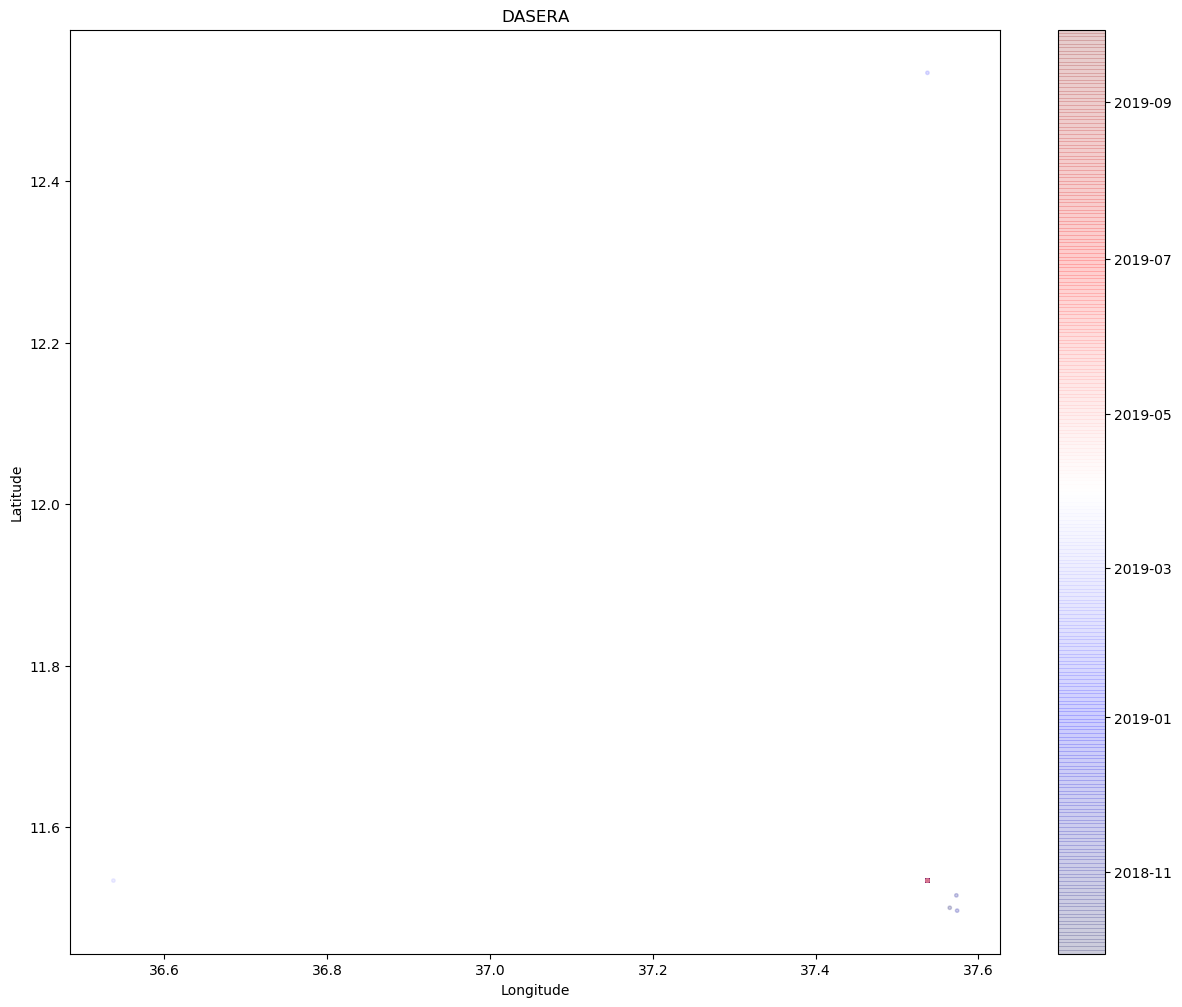

In [30]:
# We shuffle the dataframe. Otherwise it could be that when there are several inspections, we always
# see the color of the last one. This could also be solved adding certain transparency level
df = faw[faw.locationName == 'dasera'].sample(frac=1).reset_index(drop=True)

# Scouting inspection plot by latitude longitude, with date represented as color:

figure(figsize=(12,8))


x = df.longitude

y = df.latitude

t_string = df.date

t = [mdates.date2num(datetime.datetime.strptime(i, "%m/%d/%Y %H:%M")) for i in t_string]

fig, ax = plt.subplots(figsize=(15,12))

sc = ax.scatter(x, y, c=t, marker='.', s=25, cmap='seismic', alpha=0.2)


loc = mdates.AutoDateLocator()
fig.colorbar(sc, ticks=loc,
             format=mdates.AutoDateFormatter(loc))

plt.title('DASERA')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

#### We can hardly see that there are inspections in both years indeed, so we'll not use this type of plot

Text(0.5, 0, 'Month')

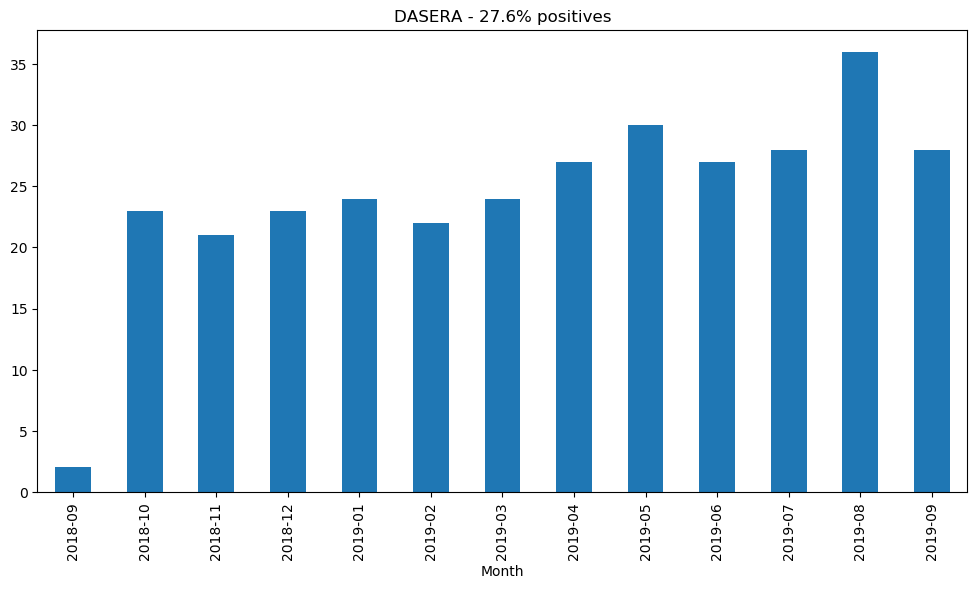

In [31]:
df = faw[faw.locationName == 'dasera']

# Number of scouting inspections by month for specific area
month = [datetime.datetime.strptime(i, "%m/%d/%Y %H:%M") for i in df.date]
month = [dt.strftime("%Y-%m") for dt in month]

ax = df.groupby(month).count().date.plot.bar(
    title='DASERA - 27.6% positives')
ax.set_xlabel('Month')

In [32]:
df[df.cropMain=='maize'].shape[0]/df.shape[0]

1.0

Text(0.5, 0, 'Month')

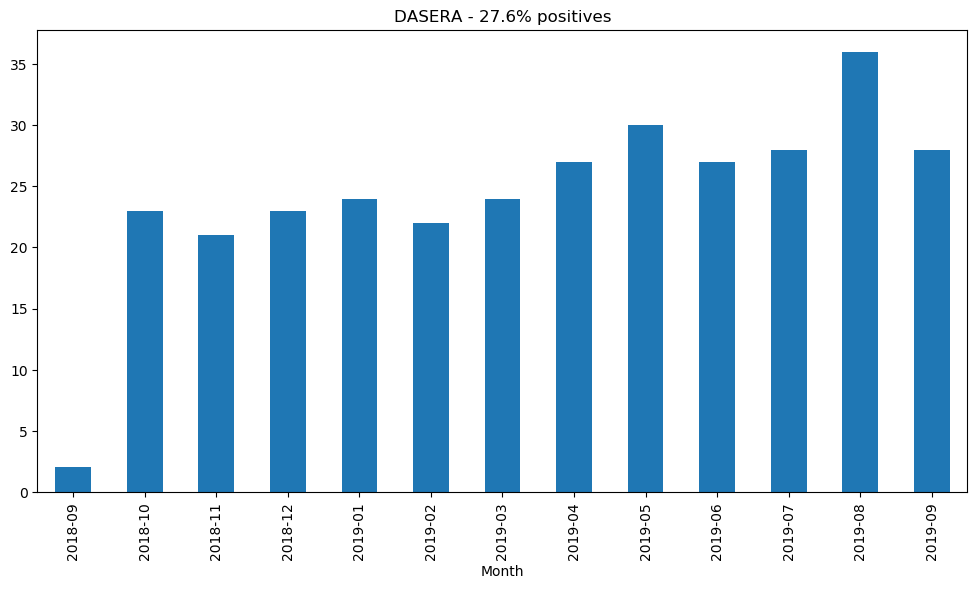

In [33]:
df = faw[(faw.locationName == 'dasera') & (faw.cropMain == 'maize')]

# Number of scouting inspections by month for specific area
month = [datetime.datetime.strptime(i, "%m/%d/%Y %H:%M") for i in df.date]
month = [dt.strftime("%Y-%m") for dt in month]

ax = df.groupby(month).count().date.plot.bar(
    title='DASERA - 27.6% positives')
ax.set_xlabel('Month')

<ipython-input-34-11c9cc5d4e91>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = [dt.strftime("%Y-%m") for dt in month]


Text(0.5, 0, 'Month')

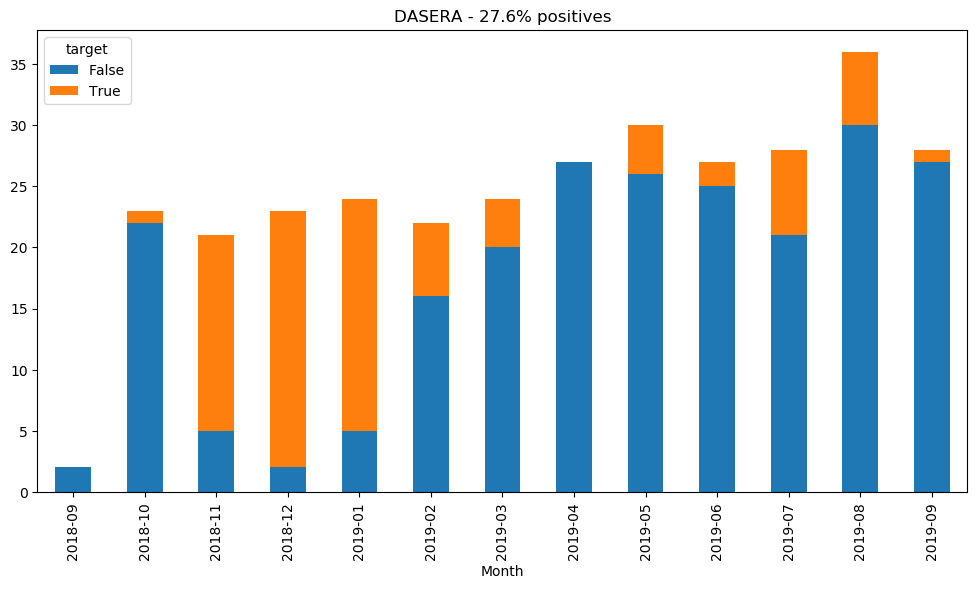

In [34]:
df = faw[(faw.locationName == 'dasera')]

# Number of scouting inspections by month for specific area
month = [datetime.datetime.strptime(i, "%m/%d/%Y %H:%M") for i in df.date]
df['month'] = [dt.strftime("%Y-%m") for dt in month]

ax = df.groupby('month').target.value_counts().unstack(1).plot.bar(
    title='DASERA - 27.6% positives', stacked=True)
ax.set_xlabel('Month')


Text(0.5, 0, 'Month')

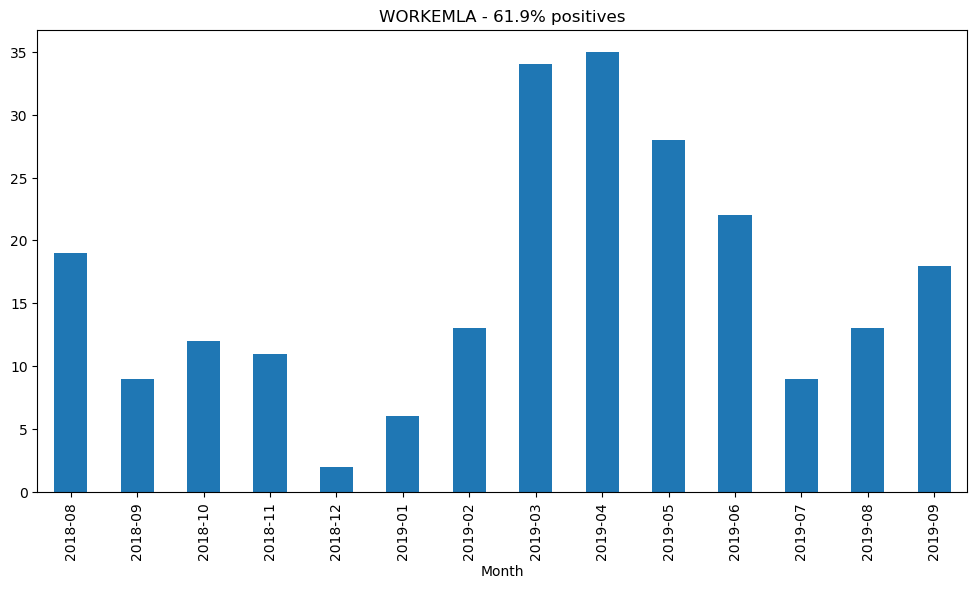

In [35]:
df = faw[faw.locationName == 'workemla']

# Number of scouting inspections by month for specific area
month = [datetime.datetime.strptime(i, "%m/%d/%Y %H:%M") for i in df.date]
month = [dt.strftime("%Y-%m") for dt in month]

ax = df.groupby(month).count().date.plot.bar(
    title='WORKEMLA - 61.9% positives',stacked=True)
ax.set_xlabel('Month')

In [36]:
df[df.cropMain=='maize'].shape[0]/df.shape[0]

1.0

<ipython-input-37-5d564c32cc35>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = [dt.strftime("%Y-%m") for dt in month]


Text(0.5, 0, 'Month')

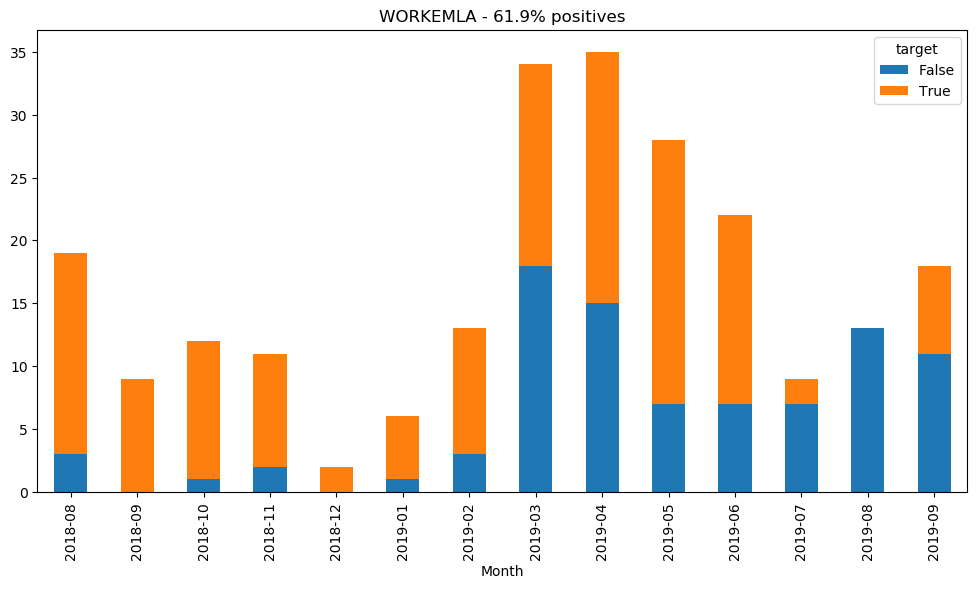

In [37]:
df = faw[(faw.locationName == 'workemla')]

# Number of scouting inspections by month for specific area
month = [datetime.datetime.strptime(i, "%m/%d/%Y %H:%M") for i in df.date]
df['month'] = [dt.strftime("%Y-%m") for dt in month]

ax = df.groupby('month').target.value_counts().unstack(1).plot.bar(
    title='WORKEMLA - 61.9% positives',stacked=True)
ax.set_xlabel('Month')


Text(0.5, 0, 'Month')

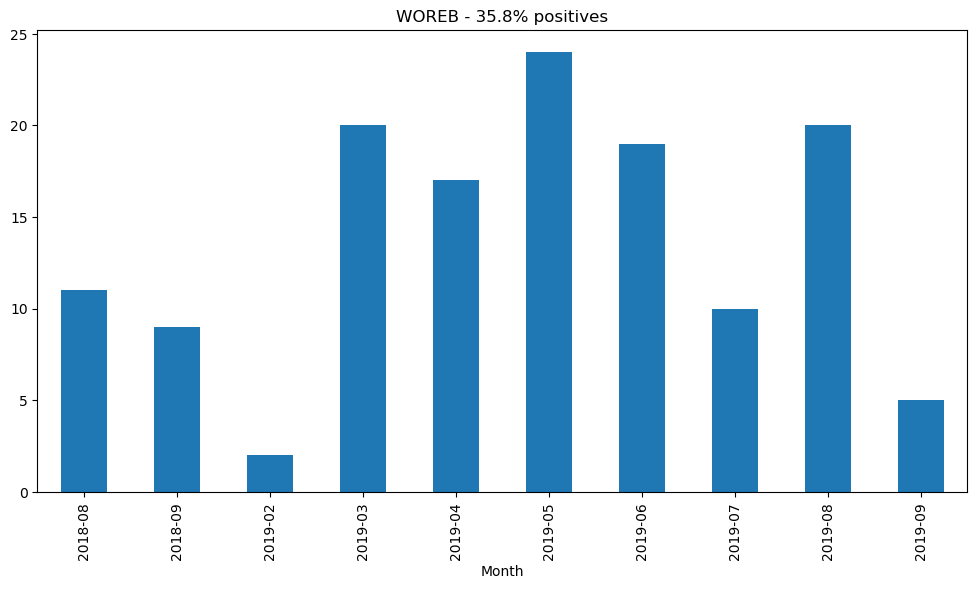

In [38]:
df = faw[faw.locationName == 'woreb']

# Number of scouting inspections by month for specific area
month = [datetime.datetime.strptime(i, "%m/%d/%Y %H:%M") for i in df.date]
month = [dt.strftime("%Y-%m") for dt in month]

ax = df.groupby(month).count().date.plot.bar(
    title='WOREB - 35.8% positives')
ax.set_xlabel('Month')

<ipython-input-39-43968f270c49>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = [dt.strftime("%Y-%m") for dt in month]


Text(0.5, 0, 'Month')

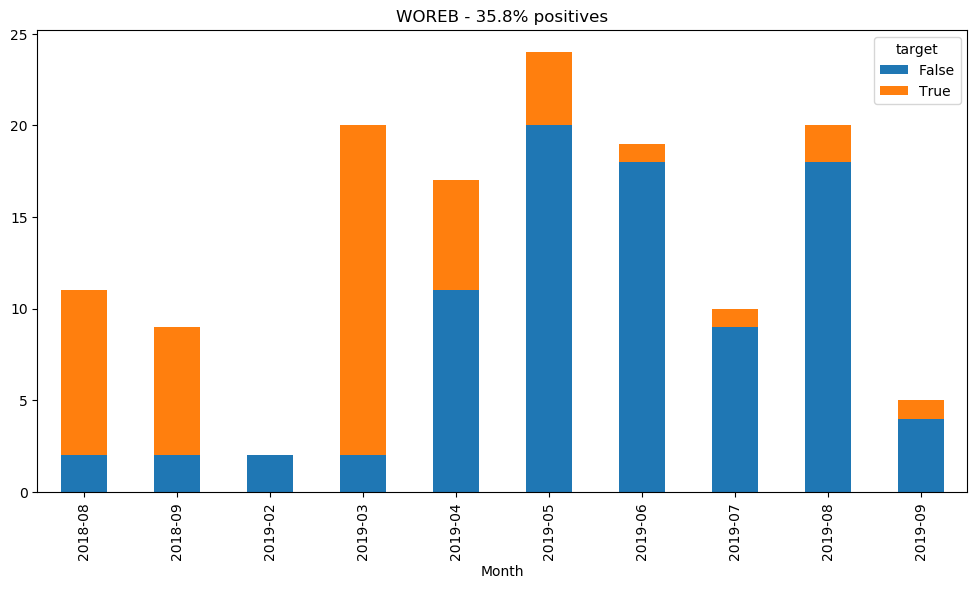

In [39]:
df = faw[(faw.locationName == 'woreb')]

# Number of scouting inspections by month for specific area
month = [datetime.datetime.strptime(i, "%m/%d/%Y %H:%M") for i in df.date]
df['month'] = [dt.strftime("%Y-%m") for dt in month]

ax = df.groupby('month').target.value_counts().unstack(1).plot.bar(
    title='WOREB - 35.8% positives', stacked=True)
ax.set_xlabel('Month')


<ipython-input-40-c197f87d7999>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = [dt.strftime("%Y-%m") for dt in month]


Text(0.5, 0, 'Month')

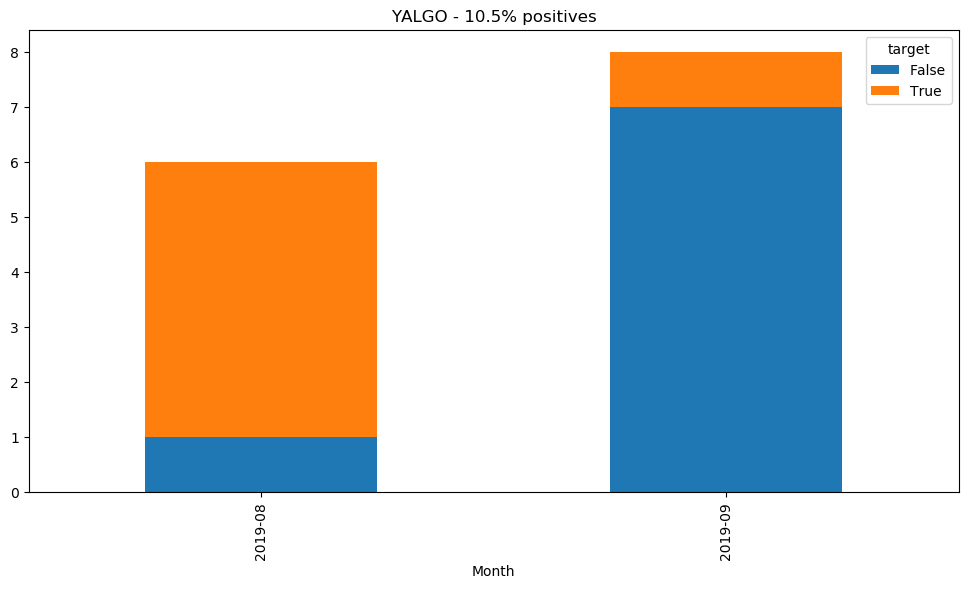

In [40]:
df = faw[(faw.locationName == 'Yalgo')]

# Number of scouting inspections by month for specific area
month = [datetime.datetime.strptime(i, "%m/%d/%Y %H:%M") for i in df.date]
df['month'] = [dt.strftime("%Y-%m") for dt in month]

ax = df.groupby('month').target.value_counts().unstack(1).plot.bar(
    title='YALGO - 10.5% positives', stacked=True)
ax.set_xlabel('Month')


<ipython-input-41-87504f841674>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = [dt.strftime("%Y-%m") for dt in month]


Text(0.5, 0, 'Month')

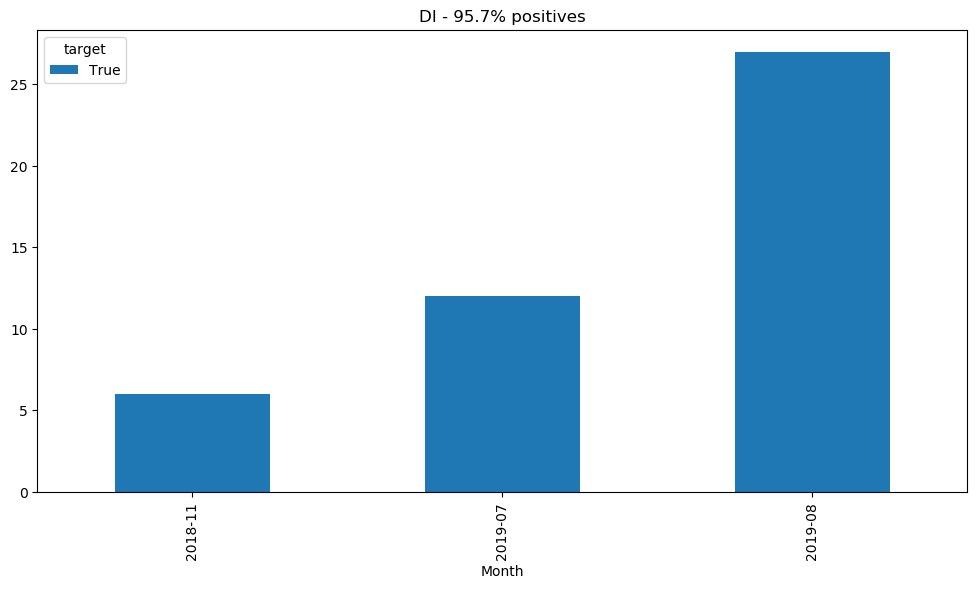

In [41]:
df = faw[(faw.locationName == 'Di')]

# Number of scouting inspections by month for specific area
month = [datetime.datetime.strptime(i, "%m/%d/%Y %H:%M") for i in df.date]
df['month'] = [dt.strftime("%Y-%m") for dt in month]

ax = df.groupby('month').target.value_counts().unstack(1).plot.bar(
    title='DI - 95.7% positives', stacked=True)
ax.set_xlabel('Month')

<ipython-input-42-fda51dfd75ca>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = [dt.strftime("%Y-%m") for dt in month]


Text(0.5, 0, 'Month')

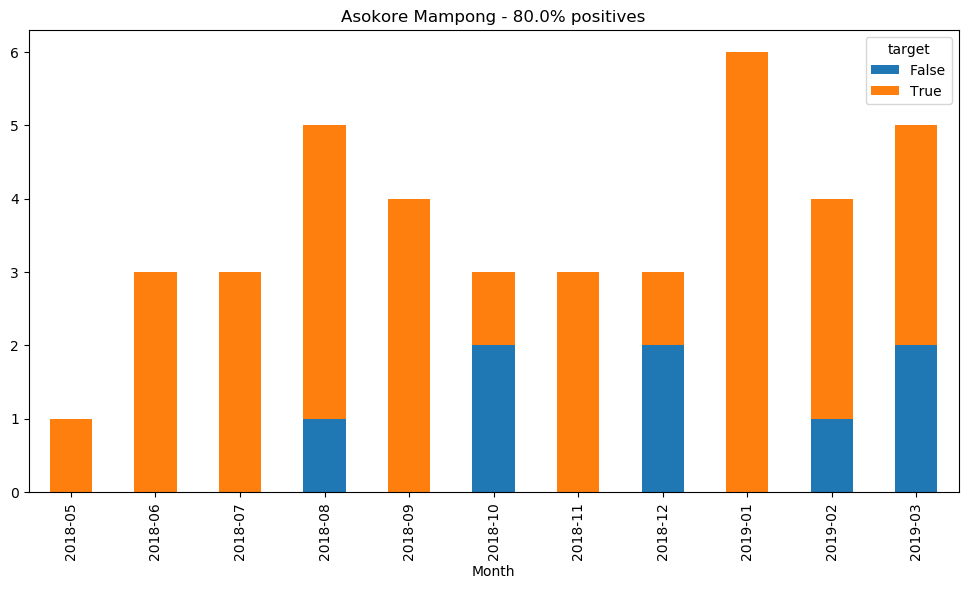

In [42]:
df = faw[(faw.locationName == "Asokore Mampong ")]

# Number of scouting inspections by month for specific area
month = [datetime.datetime.strptime(i, "%m/%d/%Y %H:%M") for i in df.date]
df['month'] = [dt.strftime("%Y-%m") for dt in month]

ax = df.groupby('month').target.value_counts().unstack(1).plot.bar(
    title='Asokore Mampong - 80.0% positives', stacked=True)
ax.set_xlabel('Month')


<ipython-input-43-2eda1fe6feb9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = [dt.strftime("%Y-%m") for dt in month]


Text(0.5, 0, 'Month')

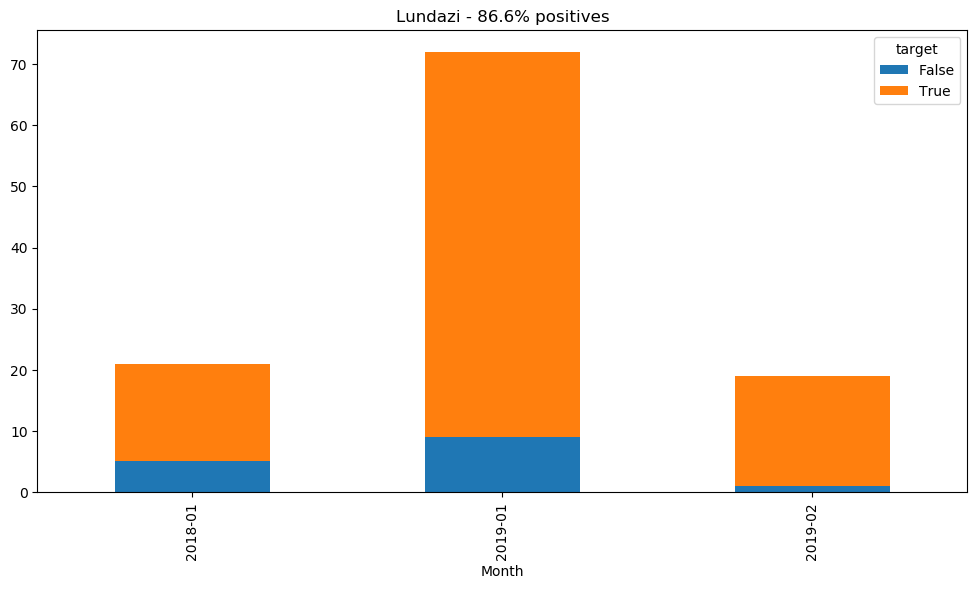

In [43]:
df = faw[(faw.locationName == 'Lundazi')]

# Number of scouting inspections by month for specific area
month = [datetime.datetime.strptime(i, "%m/%d/%Y %H:%M") for i in df.date]
df['month'] = [dt.strftime("%Y-%m") for dt in month]

ax = df.groupby('month').target.value_counts().unstack(1).plot.bar(
    title='Lundazi - 86.6% positives', stacked=True)
ax.set_xlabel('Month')


In [44]:
# Proportion of positives in the months without methodology:
df.target[((pd.Series(month) == '2018-08') | (pd.Series(month) == '2018-09')).values].mean()

nan

In [45]:
# Proportion of positives in the months with methodology:
df.target[((pd.Series(month) != '2018-08') & (pd.Series(month) != '2018-09')).values].mean()

0.8660714285714286

Text(0.5, 0, 'Month')

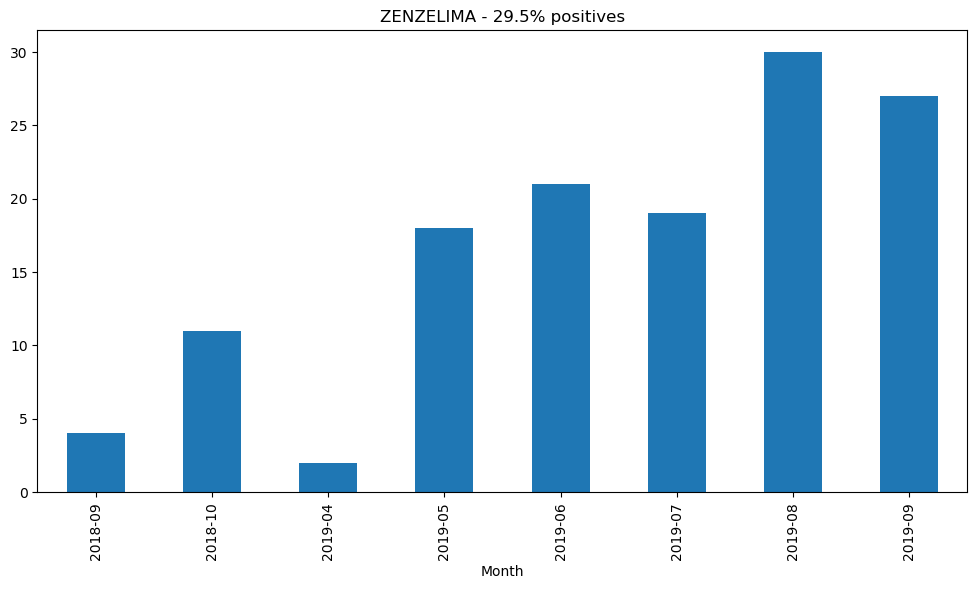

In [46]:
df = faw[faw.locationName == 'Zenzelima']

# Number of scouting inspections by month for specific area
month = [datetime.datetime.strptime(i, "%m/%d/%Y %H:%M") for i in df.date]
month = [dt.strftime("%Y-%m") for dt in month]

ax = df.groupby(month).count().date.plot.bar(
    title='ZENZELIMA - 29.5% positives')
ax.set_xlabel('Month')

In [47]:
# Proportion of positives in the months without methodology:
df.target[((pd.Series(month) == '2018-09') | (pd.Series(month) == '2018-10')).values].mean()

0.9333333333333333

In [48]:
# Proportion of positives in the months with methodology:
df.target[((pd.Series(month) != '2018-09') & (pd.Series(month) != '2018-10')).values].mean()

0.21367521367521367

Text(0.5, 0, 'Month')

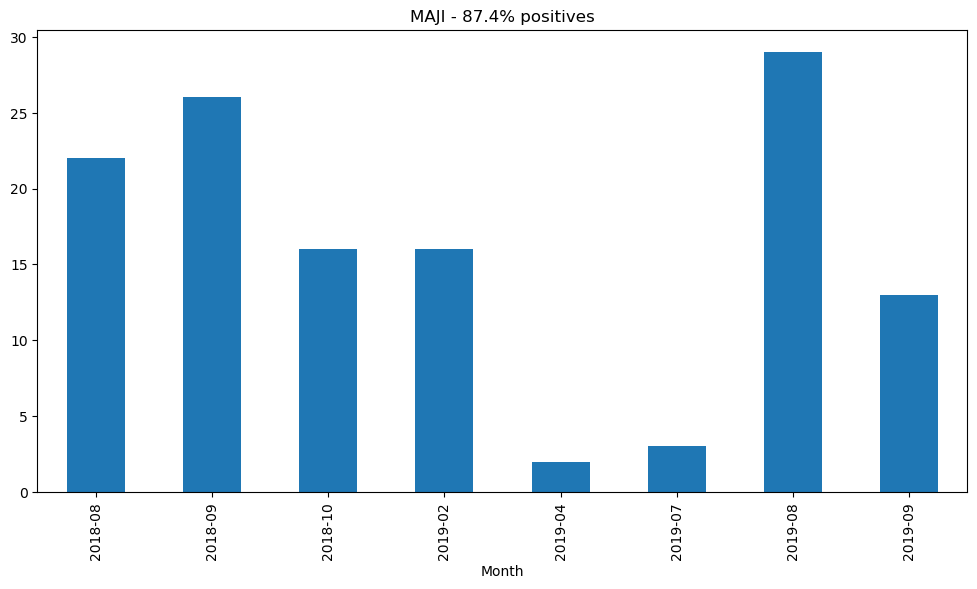

In [49]:
df = faw[faw.locationName == 'maji']

# Number of scouting inspections by month for specific area
month = [datetime.datetime.strptime(i, "%m/%d/%Y %H:%M") for i in df.date]
month = [dt.strftime("%Y-%m") for dt in month]

ax = df.groupby(month).count().date.plot.bar(
    title='MAJI - 87.4% positives')
ax.set_xlabel('Month')

### To finish, let's look at the location "??" (Which is almost only non-maize crops, so we include those crops here)

<Figure size 1200x800 with 0 Axes>

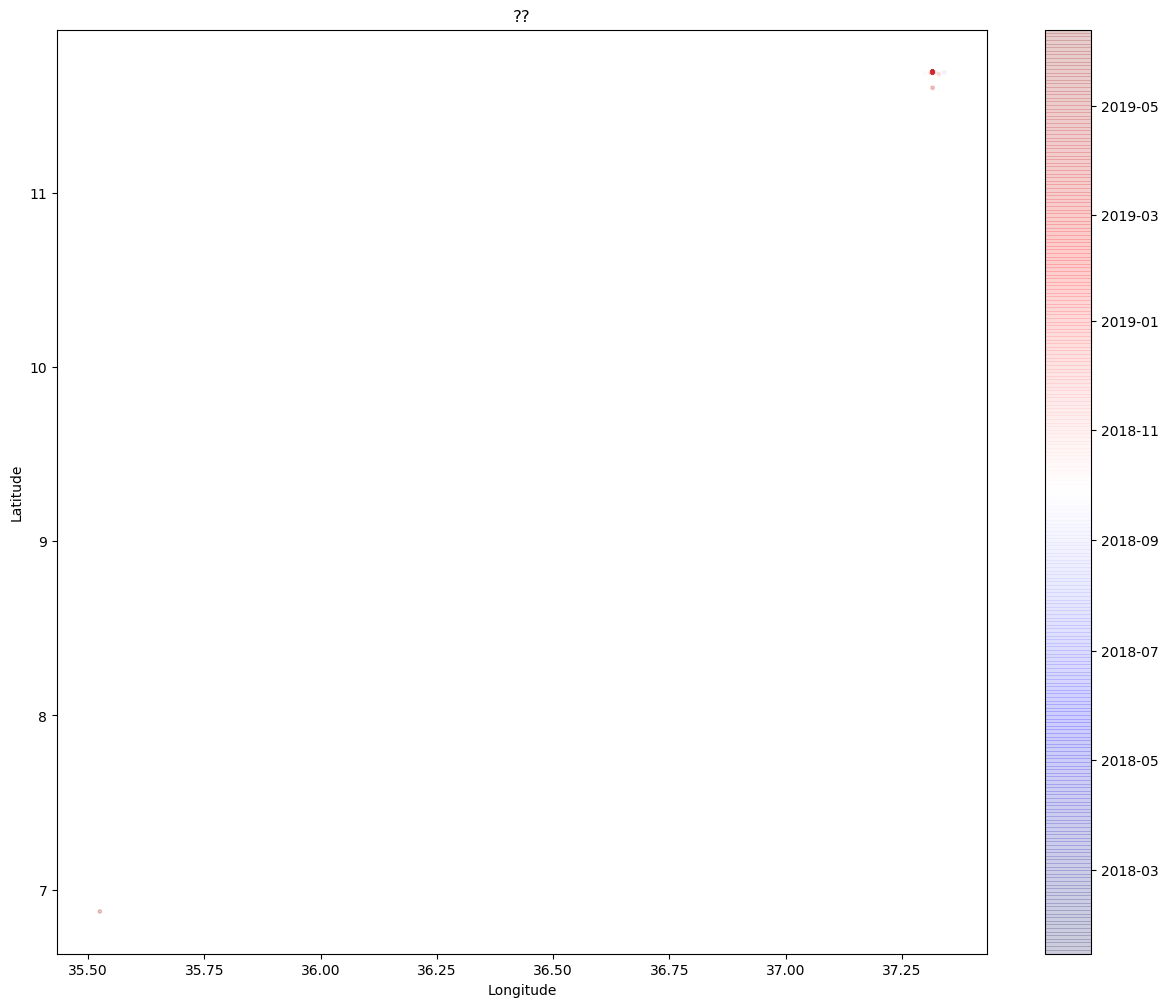

In [50]:
# We shuffle the dataframe. Otherwise it could be that when there are several inspections, we always
# see the color of the last one. This could also be solved adding certain transparency level
df = faw_orig[faw_orig.locationName == '??'].sample(frac=1).reset_index(drop=True)

# Scouting inspection plot by latitude longitude, with date represented as color:

figure(figsize=(12,8))


x = df.longitude

y = df.latitude

t_string = df.date

t = [mdates.date2num(datetime.datetime.strptime(i, "%m/%d/%Y %H:%M")) for i in t_string]

fig, ax = plt.subplots(figsize=(15,12))
# ax.set_xlim((20, 50))
# ax.set_ylim((-30, 20))

sc = ax.scatter(x, y, c=t, marker='.', s=25, cmap='seismic', alpha=0.2)


loc = mdates.AutoDateLocator()
fig.colorbar(sc, ticks=loc,
             format=mdates.AutoDateFormatter(loc))

plt.title('??')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

Text(0.5, 0, 'Month')

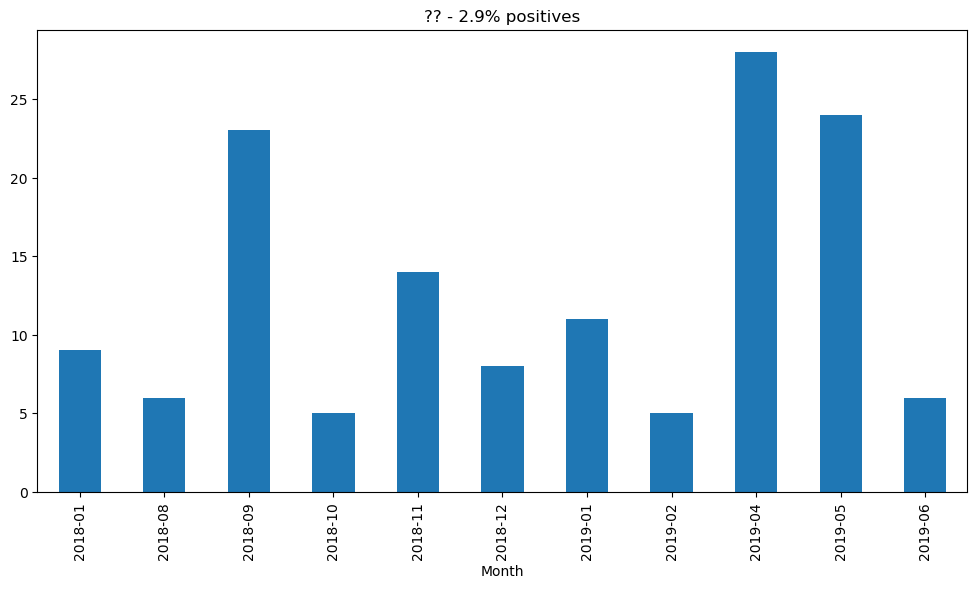

In [51]:
df = faw_orig[faw_orig.locationName == '??']

# Number of scouting inspections by month for specific area
month = [datetime.datetime.strptime(i, "%m/%d/%Y %H:%M") for i in df.date]
month = [dt.strftime("%Y-%m") for dt in month]

ax = df.groupby(month).count().date.plot.bar(
    title='?? - 2.9% positives')
ax.set_xlabel('Month')

In [52]:
# How many are maize:
(df.cropMain == 'maize').mean()

0.014388489208633094

### Quick insights:

Dasera: Example of consistent methodology of data collection. Therefore we get a low percentage of positives and the data could be fed to ML models with lower biases - 27.6%

Workemla: Some consistency in data collection but not so regular - 61.9%

Woreb August and September 2018: Example of reactive app usage - 80% positives
Woreb 2019: Example of consistent methodology of data collection - 28.2%

Zenzelima September and August 2018: Example of reactive app usage - 93.3% positives
Zenzelima 2019: Example of consistent methodology of data collection - 21.4% positives

Maji: Example of reactive app usage - 87.4% positives

??: Not much to say. It's not comparable - 1.4% are maize vs 100% when studying the other locations

All examples in Ethopia - Seasons for Maize in Ethopia: Belg (March/April-May/June) & Meher (July/August-September/October)
Scouting follows this pattern.


https://link.springer.com/article/10.1007/s12571-015-0488-z